In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
import pandas as pd

In [3]:
GT_PATH = "vicon/vicon_eight.csv"
YOLOTAG_PATH = "yolotag_filter/logger_2024-02-12_13:27:21.csv"
GT = pd.read_csv(GT_PATH)
YOLOTAG = pd.read_csv(YOLOTAG_PATH)

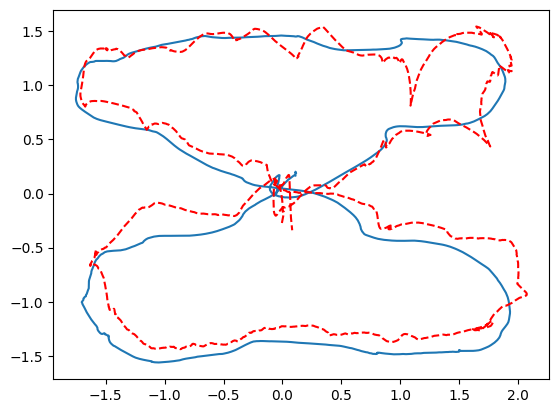

In [15]:
# plot results 
X =  - (3.5 + YOLOTAG["x"])
Y = YOLOTAG["y"]-19.25

plt.plot(GT["x"], GT["y"])
plt.plot(X, Y, '--r')

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [18]:
def plot_signal(X, GT, name):
    t = np.linspace(0, len(X) * 0.03, len(X))
    t1 = np.linspace(0, len(X) * 0.03, len(GT['x']))

    plt.plot(t, X, '--r')
    plt.plot(t1, GT[name], '--g')

In [19]:
def fft_plot(y):
    yhat = np.fft.fft(y)
    t = np.linspace(0, len(y) * 0.03, len(y))

    fcycles = np.fft.fftfreq(len(t), d=30)  # the frequencies in cycles/s

    plt.figure()
    plt.plot(t,y)
    plt.ylabel("$y(t)$")
    plt.xlabel("$t$ (s)")
    plt.xlim([min(t),max(t)])

    # Plot the power spectrum
    plt.figure()
    plt.plot(fcycles,np.absolute(yhat))
    plt.xlim([-0.001,0.001])
    # plt.xlim([-0.00004, 0.00004])
    plt.xlabel("$\omega$ (cycles/s)")
    plt.ylabel("$|\hat{y}|$")

In [20]:
# Butterworth filter
wc = 2*np.pi*5; # cutoff frequency (rad/s)
n = 2; # Filter order

# Compute the Butterworth filter coefficents
a = np.zeros(n+1);
gamma = np.pi/(2.0*n);
a[0] = 1; # first coef is always 1
for k in range(0,n):
    rfac = np.cos(k*gamma)/np.sin((k+1)*gamma);
    a[k+1] = rfac*a[k]; # Other coefficients by recursion

print("Butterworth polynomial coefficients a_i:                " + str(a))

# Adjust the cutoff frequency
c = np.zeros(n+1);
for k in range(0,n+1):
    c[n-k] = a[k]/pow(wc,k)

print("Butterworth coefficients with frequency adjustment c_i: " + str(c))

Butterworth polynomial coefficients a_i:                [1.         1.41421356 1.        ]
Butterworth coefficients with frequency adjustment c_i: [0.00101321 0.04501582 1.        ]


In [ ]:
# Low-pass filter
from scipy import signal
signalFreq = [2,50];
w0 = 2*np.pi*5; # pole frequency (rad/s)
num = [1];      # transfer function numerator coefficients
den = c;        # transfer function denominator coefficients
lowPass = signal.TransferFunction(num,den) # Transfer function

# Generate the bode plot
w = np.logspace( np.log10(min(signalFreq)*2*np.pi/10), np.log10(max(signalFreq)*2*np.pi*10), 500 )
w, mag, phase = signal.bode(lowPass,w)

# Magnitude plot
plt.figure()
plt.semilogx(w, mag)
for sf in signalFreq:
    plt.semilogx([sf*2*np.pi,sf*2*np.pi],[min(mag),max(mag)],'k:')
plt.ylabel("Magnitude ($dB$)")
plt.xlim([min(w),max(w)])
plt.ylim([min(mag),max(mag)])

# Phase plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.ylabel("Phase ($^\circ$)")
plt.xlabel("$\omega$ (rad/s)")
plt.xlim([min(w),max(w)])
plt.show()

In [ ]:
# Compute the discrete low pass with delta_t = 1/samplingFrequency
dt = 1.0/samplingFreq;
discreteLowPass = lowPass.to_discrete(dt,method='gbt',alpha=0.5)
print(discreteLowPass)

In [ ]:
# The coefficients from the discrete form of the filter transfer function (but with a negative sign)
b = discreteLowPass.num;
a = -discreteLowPass.den;
print("Filter coefficients b_i: " + str(b))
print("Filter coefficients a_i: " + str(a[1:]))

# Filter the signal
Nb = len(b)
yfilt = np.zeros(len(y));
for m in range(3,len(y)):
    yfilt[m] = b[0]*y[m];
    for i in range(1,Nb):
        yfilt[m] += a[i]*yfilt[m-i] + b[i]*y[m-i];
    
# View the result
# Plot the signal
plt.figure()
plt.plot(t,y);
plt.plot(t,yfilt);
plt.ylabel("$y(t)$")
plt.xlim([min(t),max(t)]);

# Generate Fourier transform
yfilthat = np.fft.fft(yfilt)
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

plt.figure()
plt.plot(fcycles,np.absolute(yhat));
plt.plot(fcycles,np.absolute(yfilthat));
plt.xlim([-100,100]);
plt.xlabel("$\omega$ (cycles/s)");
plt.ylabel("$|\hat{y}|$");